In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
sns.set()

In [127]:
serie_1 = pd.read_csv('Clase 1/BYMA.csv',index_col=1,parse_dates=True)
serie_2 = pd.read_csv('Clase 1/S1MME_week44.csv', index_col=0,parse_dates=True)
serie_3 = pd.read_csv('Clase 1/S1MME_week45.csv')
serie_4 = pd.read_csv('Clase 1/SS1.out.csv')
serie_5 = pd.read_csv('Clase 1/TECO2.2000.2021.csv')
serie_6 = pd.read_csv('Clase 1/TECO2.2010.2021.csv')
serie_7 = pd.read_csv('Clase 1/YPFD.2000.2021.csv', index_col=1,parse_dates=True)

# Análisis serie YPFD.2000.2021

In [128]:
serie_7.head(5
             )

,Unnamed: 0,ultimoPrecio
fechaHora,,
2021-06-29 17:00:01.710,0,783.15
2021-06-28 17:00:03.613,1,807.00
2021-06-25 17:00:02.397,2,831.65
2021-06-24 17:00:03.497,3,871.40
2021-06-23 17:00:03.290,4,857.65


In [129]:
s7 = serie_7.drop(['Unnamed: 0'], axis=1)

In [130]:
s7.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4840 entries, 2021-06-29 17:00:01.710000 to 2001-12-03 00:00:00
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ultimoPrecio  4840 non-null   float64
dtypes: float64(1)
memory usage: 75.6 KB


In [131]:
s7.describe()

,ultimoPrecio
count,4840.000000
mean,115.680014
std,239.699517
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,950.050000


Text(0.5, 0, 'Fecha')

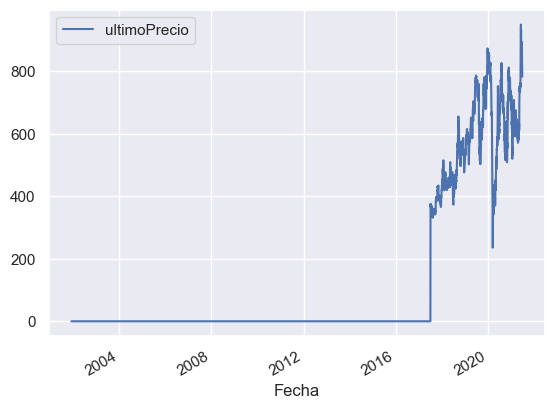

In [132]:
s7.plot()
plt.xlabel('Fecha')

Si bien con la función 'describe' se puede observar que la medición de los valores aparece recién en el cuarto cuartil, mediante un grafico lo podemos visualizar mejor. A continuación descartamos todos los datos que tienen valor "0" y analizaamos más detenidamente la serie.

In [133]:
df = s7.loc[(s7 > 0).all(axis=1), :]

Text(0, 0.5, 'Precio')

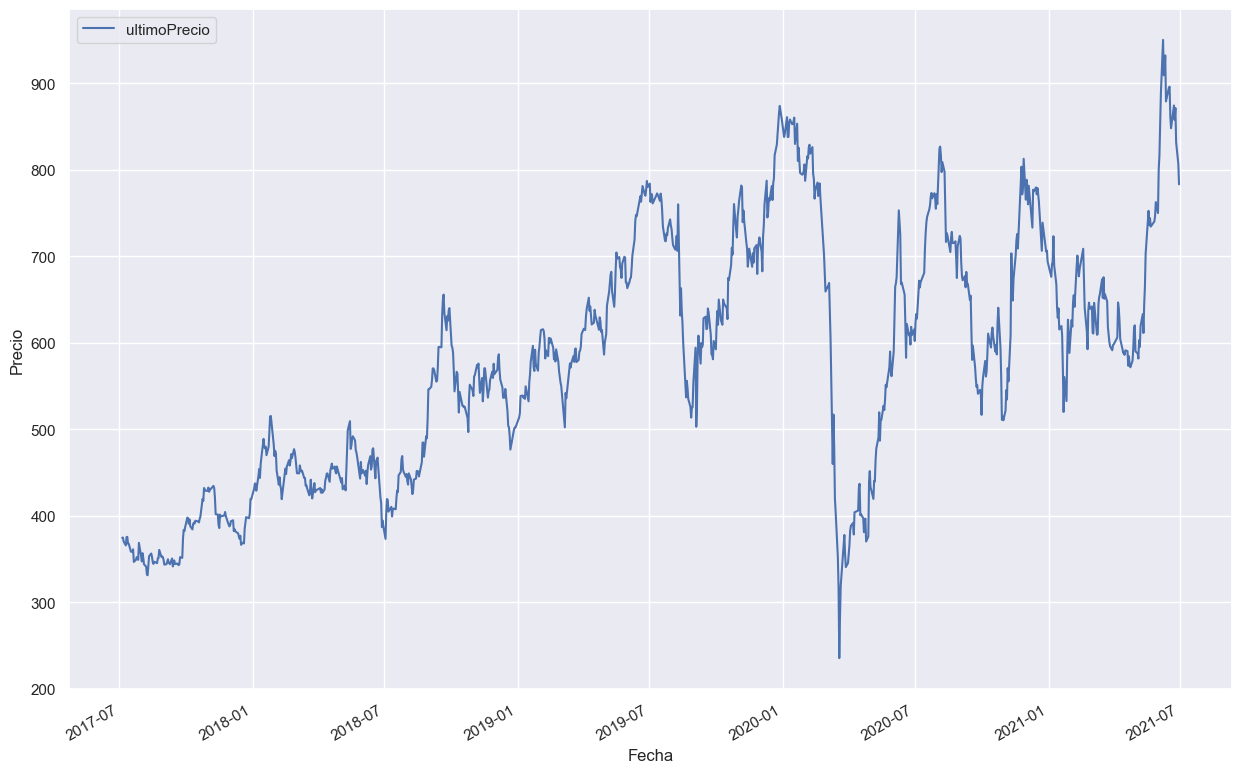

In [134]:

df.plot(figsize=(15,10))
plt.xlabel('Fecha')
plt.ylabel('Precio')

Viendo más detenidamente la serie, se puede ver una tendencia cresciente a largo plazo, con sus subas y bajas. Otra observación llamativa es la fuerte caída que presenta el precio de YPF, lo cual puede llegar a ser por el comienzo de la pandemia, donde el valor mínimo se da aproximadamente en los meses de marzo y abril, donde los contagios estaban en aumento.

# Análisis serie de tiempo S1MME_week44

In [135]:
serie_2.head(10
             )

,NENAME,S1_mode_combined_attach_request_times_SEQ,S1_mode_combined_attach_success_times_SEQ
MyDay,,,
2020-10-26 00:00:00,MME1BEL,366679,238962
2020-10-26 01:00:00,MME1BEL,334383,210681
2020-10-26 02:00:00,MME1BEL,305981,188072
2020-10-26 03:00:00,MME1BEL,292139,179611
2020-10-26 04:00:00,MME1BEL,280756,171653
2020-10-26 05:00:00,MME1BEL,283911,175885
2020-10-26 06:00:00,MME1BEL,304370,192381
2020-10-26 07:00:00,MME1BEL,335904,220369
2020-10-26 08:00:00,MME1BEL,358400,238373


In [136]:
serie_2.describe()

,S1_mode_combined_attach_request_times_SEQ,S1_mode_combined_attach_success_times_SEQ
count,1008.000000,1008.000000
mean,380737.792659,247576.558532
std,67032.964046,59547.733211
min,230991.000000,123182.000000
25%,339772.750000,214970.750000
50%,383135.000000,245782.000000
75%,409693.250000,270058.750000
max,697669.000000,563395.000000


In [137]:
serie_2.isnull().sum()

NENAME                                       0
S1_mode_combined_attach_request_times_SEQ    0
S1_mode_combined_attach_success_times_SEQ    0
dtype: int64

Text(0.5, 0, 'Fecha')

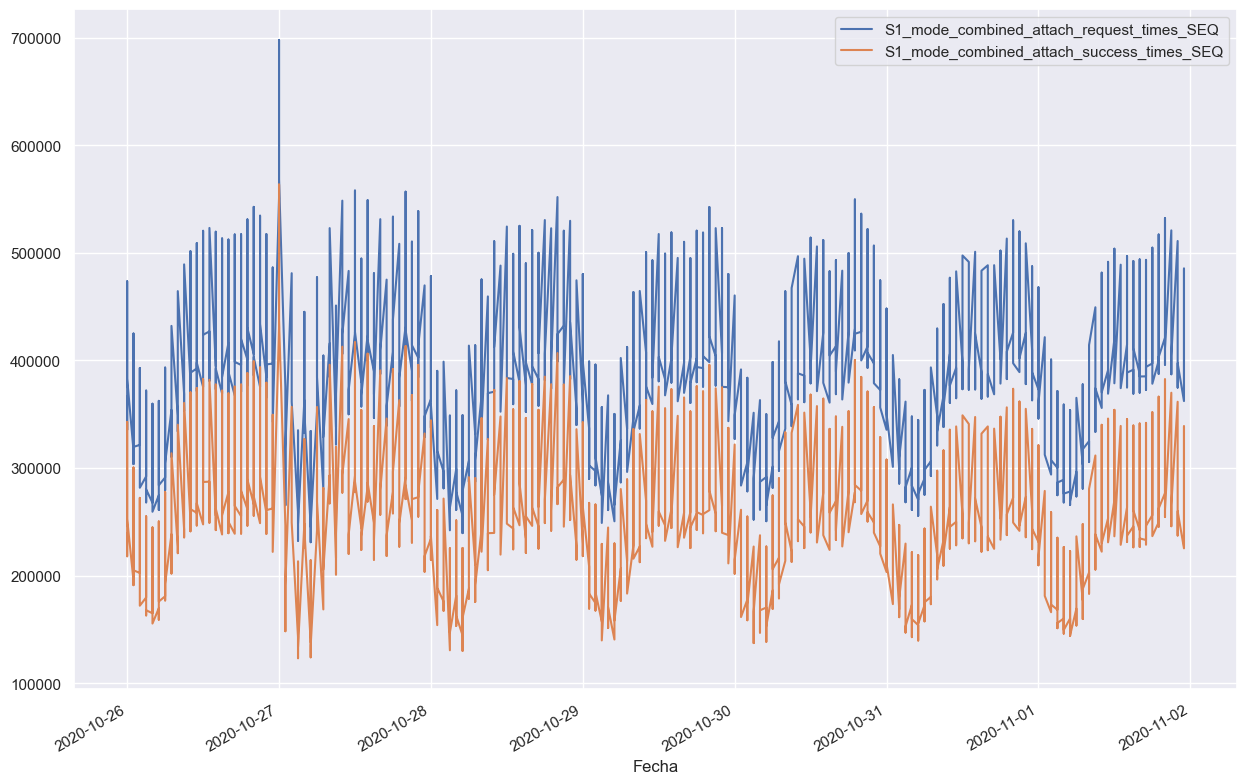

In [138]:
serie_2.plot(figsize=(15,10))
plt.xlabel('Fecha')


En esta serie de tiempo se puede observar que hay una tendencia cíclica diaria. En horario de madrugada, las mediciones suelen bajar y a medida que pasan las horas vuelve a subir. Da la impresión de ser una medición del tiempo de reaccion de alguna herramienta, el tiempo que le lleva a la herramienta en finalizar el trabajo o la energía consumida por el instrumento para completar la tarea. Para inicio de la semana se observa que el mínimo de la serie azul coincide con el máximo de la serie naranja y a medida que transcurre la semana esa brecha va aumentando. Otra cosa a observar es que en cada período, el rango de de ambas series es el mismo.

# Análisis de serie BYMA

In [139]:
serie_1.head(5
             )

,Unnamed: 0,ultimoPrecio
fechaHora,,
2021-06-29 17:00:01.553,0,724.0
2021-06-28 17:00:03.430,1,723.5
2021-06-25 17:00:02.283,2,735.5
2021-06-24 17:00:03.360,3,764.5
2021-06-23 17:00:03.163,4,759.5


In [140]:
s1 = serie_1.drop(['Unnamed: 0'], axis=1)

In [141]:
s1

,ultimoPrecio
fechaHora,
2021-06-29 17:00:01.553,724.0
2021-06-28 17:00:03.430,723.5
2021-06-25 17:00:02.283,735.5
2021-06-24 17:00:03.360,764.5
2021-06-23 17:00:03.163,759.5
...,...
2010-01-08 00:00:00.000,0.0
2010-01-07 00:00:00.000,0.0
2010-01-06 00:00:00.000,0.0


Text(0.5, 0, 'Fecha')

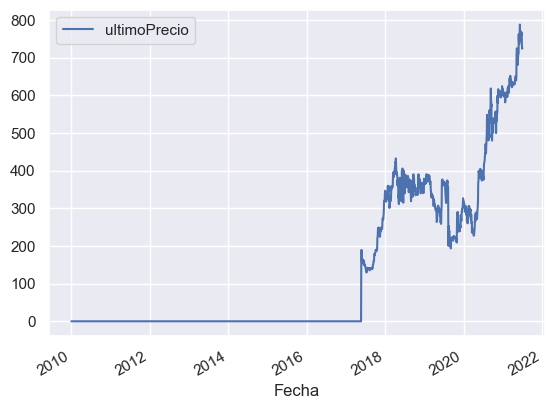

In [142]:
s1.plot()
plt.xlabel('Fecha')

Al igual que sucedió con los datos de YPF, en este dataframe desde el año 2010 hasta finales del 2017 sólo tenemos valores igual a "0" debido a que se fundó en el 2017. Se procede a descartar estos valores, dado que las mediciones recien comenzaron a finales del 2017. 

In [143]:
df1 = s1.loc[(s1 > 0).all(axis=1), :]

Text(0, 0.5, 'Precio')

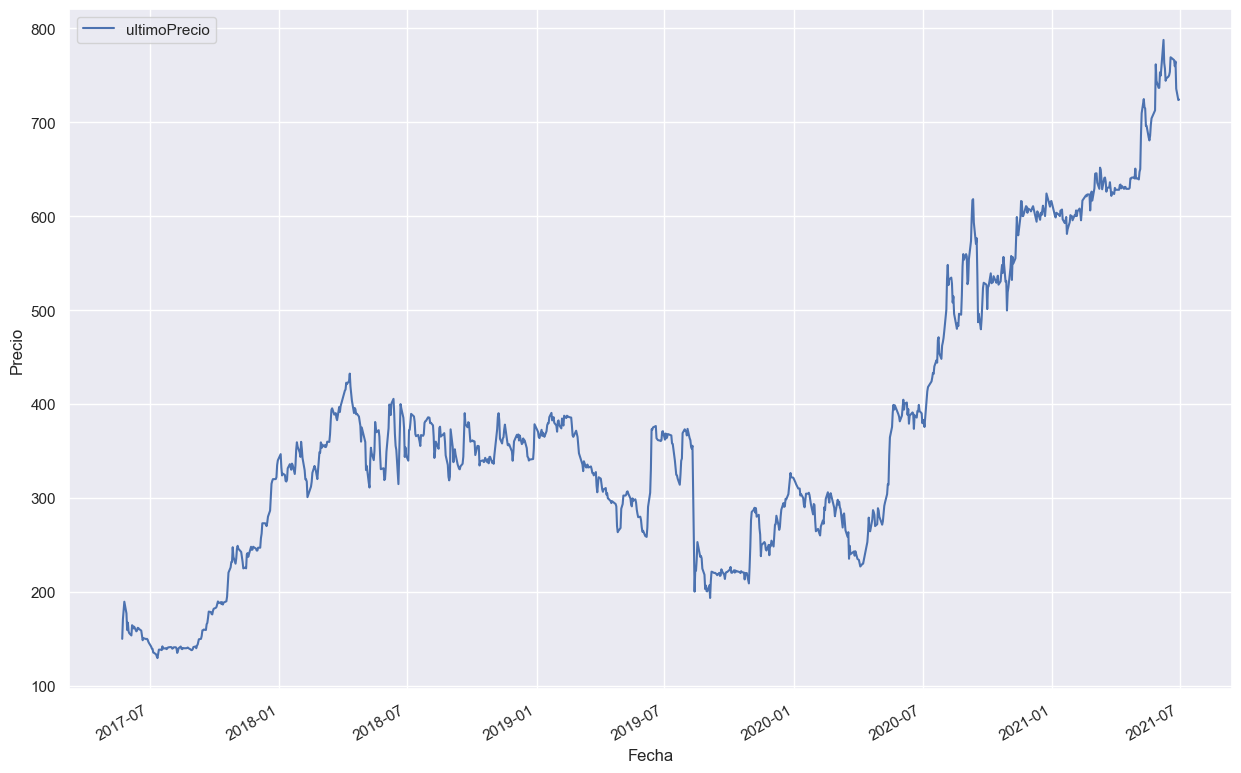

In [144]:
df1.plot(figsize=(15,10))
plt.xlabel('Fecha')
plt.ylabel('Precio')

Es una serie con tendencia cresciente a largo plazo, pero con un importante ciclo que se mantuvo en un rango de valores estable durante un período de 2 años, posiblemente a algúna circunstancia externa, como puede llegar a ser una medida política o alguna económica. Luego de esos dos años estacionarios, los datos presentan un fuerte incremento en el precio. Esto puede deberse debido a una fuerte demanda en el servicio que ofrece BYMA luego de que los mercados en Argentina comiencen a abrirse posterior a la pandemia.